In [26]:
import os
os.getcwd()
os.chdir("V:/UTD/python/Congressional - election data")
os.getcwd()
# os.listdir('.')

'V:\\UTD\\python\\Congressional - election data'

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd

# Importing and Appending the 4 datasets
data_2010 = pd.read_csv('all_house_senate_2010.csv')
data_2012 = pd.read_csv('all_house_senate_2012.csv')
data_2014 = pd.read_csv('all_house_senate_2014.csv')
data_2016 = pd.read_csv('all_house_senate_2016.csv',encoding='ANSI')
data = pd.concat([data_2010,data_2012,data_2014,data_2016])

# Coverting the data type of the column(Disbursement amount) from string to interger
data['dis_amo_in_dol'] = data['dis_amo'].str.replace('$','')
data['dis_amo_in_dol'] = data['dis_amo_in_dol'].str.replace(',','')
data['dis_amo_in_dol'] = pd.to_numeric(data['dis_amo_in_dol'])
len(data)
# data.info()
# list(data)

3327922

In the graph 1, it is observed that the expenditure by Congress is less for 2010 and 2014 midterm elections when compared to the years 2012 and 2016 president elections. How ever this differnece in the expenditures is less than expected

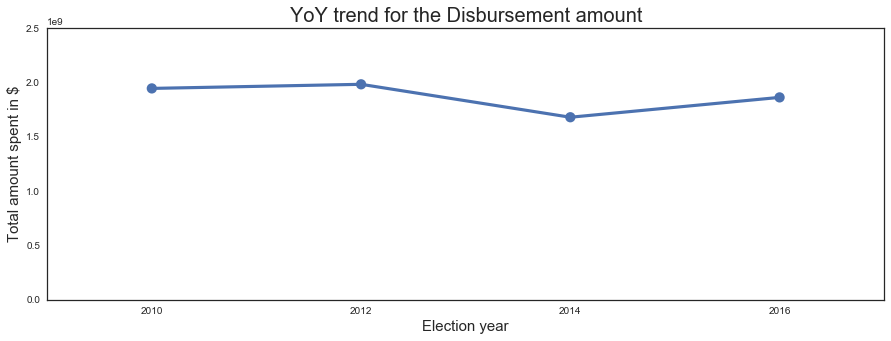

In [29]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Grouping the elction year column and sum the disbursement amount
f = pd.DataFrame(data.groupby(['ele_yea'],as_index=False).dis_amo_in_dol.sum())

# Figure settings
mpl.rc("figure", figsize=(15, 5))
sns.set_style("white")

# Graph plot and graph settings
graph1 = sns.pointplot(x="ele_yea", y="dis_amo_in_dol", data=f)
graph1.set_ylim(0,2500000000)
graph1.set_ylabel('Total amount spent in $',size=15)
graph1.set_xlabel('Election year',size=15)
graph1.set_title('YoY trend for the Disbursement amount',size=20)

There are few columns of data where the recieved date is before 2009 and after 2017 which are obvious errors. 
These observations are removed for few analysis. The data in this filter is ~1%

In [30]:
# Subsetting the recieved year from 2009 to 2016. 
data['year_rec'] = pd.to_numeric(data.dis_dat.str[0:4])
data1 = data[(data['year_rec'] >= 2009) & (data['year_rec'] <= 2016)]
data1['month_rec'] = pd.DatetimeIndex(data1['dis_dat']).month
# data1['day_rec'] = pd.DatetimeIndex(data1['dis_dat']).day
# data1['weekday_rec'] = pd.DatetimeIndex(data1['dis_dat']).weekday
len(data1)

3326537

There is a clear seasonal trend seen in the data over years. The disbursement amount is at the peak in the month of october every two years. Since the elections are held in the month of november, the expenditure could be maximum in the previous month.
It not just for october, the seasonality trend is seen for other months also.

In [31]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as PLT

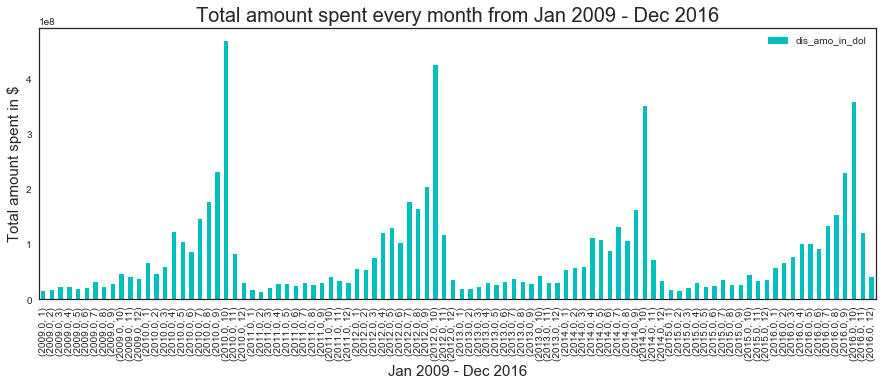

In [32]:
# groupig the amount spent by the year and month of recieved date
g = pd.DataFrame(data1.groupby(['year_rec','month_rec']).dis_amo_in_dol.sum())

# Graph and graph settings
fig = plt.figure()
fig.patch.set_facecolor('white')
graph2 = g.plot(kind='bar',figsize=(15,5),color='c')

graph2.set_ylabel('Total amount spent in $',size=15)
graph2.set_xlabel('Jan 2009 - Dec 2016',size=15)
graph2.set_title('Total amount spent every month from Jan 2009 - Dec 2016',size=20)

The expenditure from office 'House of Representatives' is higher than the office 'Senate'. This is expected as the candidates in 'House of representatives' is more in number. The amount spent from the office 'H' is on an average 1.5 times of the amount spent from the office 'S'

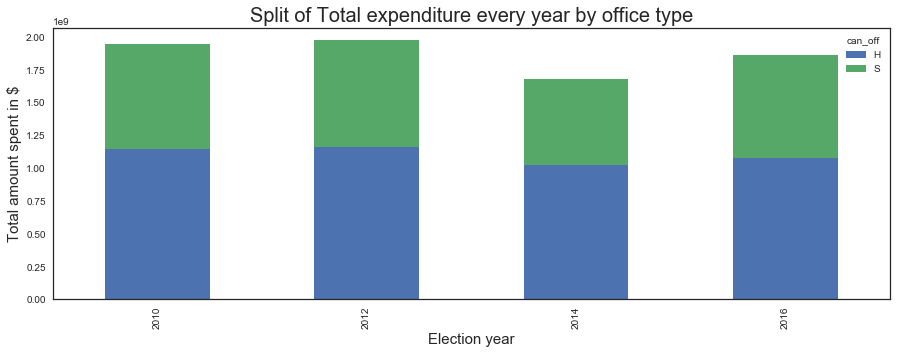

In [33]:
# Subetting the data for the office Senate and House of representatives; 
data_off = data.loc[data['can_off'].isin(["S","H"])]

# Grouping amount spent by election year and office
data_off_sub = pd.DataFrame(data_off.groupby(['ele_yea','can_off'],as_index=False).dis_amo_in_dol.sum()) #plot(kind='bar',figsize=(15,6),stacked=True)

# df1.H.sum()/df1.S.sum()
# Graph and Graph settings
df1 = data_off_sub.pivot(index='ele_yea', columns='can_off', values='dis_amo_in_dol')
graph3 = df1.plot.bar(stacked=True,figsize=(15,5))

graph3.set_ylabel('Total amount spent in $',size=15)
graph3.set_xlabel('Election year',size=15)
graph3.set_title('Split of Total expenditure every year by office type',size=20)

In [34]:
import plotly 
plotly.tools.set_credentials_file(username='geethika.veluri', api_key='dhk7psDoBTYelA9NLzJg')

In [35]:
# Code for mapping the state code with the State name

df3 = pd.DataFrame(data.groupby(['can_off_sta'],as_index=False).dis_amo_in_dol.sum())
df3['code'] = df3['can_off_sta']
states = {
        'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona',
        'CA': 'California','CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware',
        'FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana',
        'KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine',
        'MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
        'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota',
        'TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
        'WA': 'Washington','WI': 'Wisconsin', 'WV': 'West Virginia','WY': 'Wyoming'
}
trial = df3.replace({"can_off_sta": states})
trial['category'] = 'state'
# trial.head()

The maximum amount is spent by the office from california. Since the number of 'House of representatives' are high in California than any other state, the expenditure is the highest from this state. The next highest expenditures are seen in the order Florida, NewYork and Texas which are states with high poppulation

In [36]:
# Cloropleth map for usa in plotly to show the disburse amount for each state

import plotly.plotly as py
import pandas as pd

df = trial

for col in df.columns:
    df[col] = df[col].astype(str)
df['text'] = df['can_off_sta'] + '<br>' + 'dis_amo_in_dol'+df['dis_amo_in_dol']
 
#     Defining the color and intensity
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# Defining the map settings
data_map = [ dict(type='choropleth',colorscale = scl, autocolorscale = False,locations = df['code'],
        z = df['dis_amo_in_dol'].astype(float),locationmode = 'USA-states',text = df['text'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),colorbar = dict(title = "Millions USD")) ]

# Defnig the map layout
layout = dict(title = 'Total amount spent by office in each state',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)',),)

# plot
fig = dict( data=data_map, layout=layout )
# Returns the URL location of the plot automatically when the code is run
url = py.plot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~geethika.veluri/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


The highest expenditure is spent for Administrative and Salary expenses which holds 42% of the expenses. The second and third major expenses are Advertising expenses(29%) and Solicitation & Fund raising expenses(10%

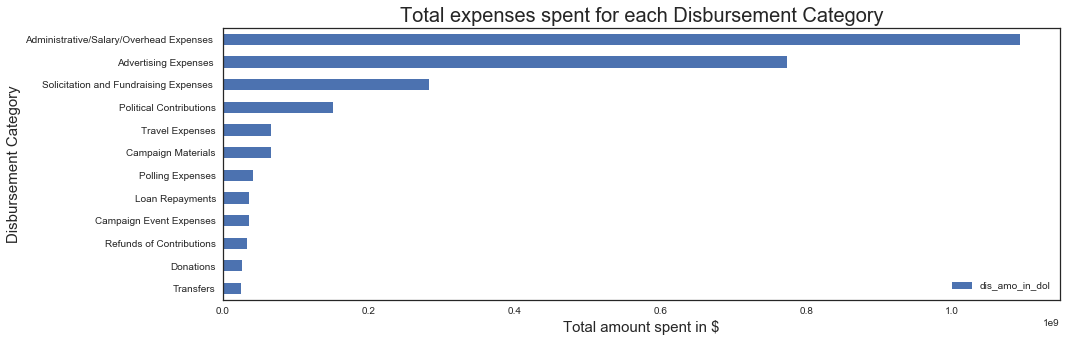

In [37]:
# Aggregating the Total amount by category description level
g = pd.DataFrame(data.groupby(['cat_des']).dis_amo_in_dol.sum().sort_values())

# Graph plot and graph settings
graph5 = g.plot.barh(figsize=(15,5))

graph5.set_ylabel('Disbursement Category',size=15)
graph5.set_xlabel('Total amount spent in $',size=15)
graph5.set_title('Total expenses spent for each Disbursement Category',size=20)

The highest amount is recieved by the state DC followed by Virginia and California which is 40% of the total disbursement amount

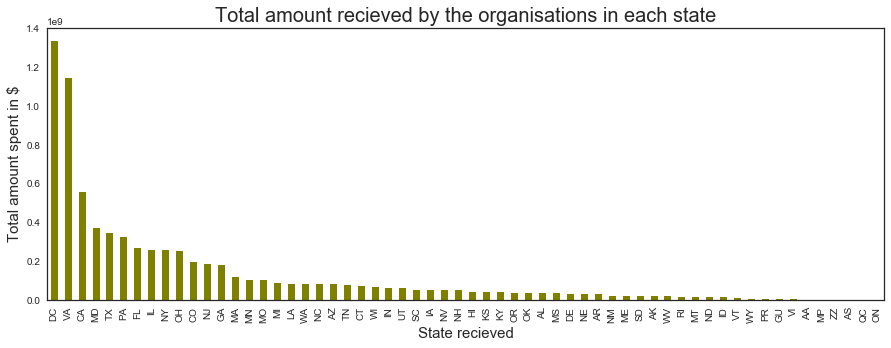

In [38]:
# Applying grup by function and plotting the graph
graph6 = data.groupby(['rec_sta']).dis_amo_in_dol.sum().sort_values(ascending=False).head(60).plot(kind='bar',figsize=(15,5),color='Olive') 

# graph settings
graph6.set_ylabel('Total amount spent in $',size=15)
graph6.set_xlabel('State recieved',size=15)
graph6.set_title('Total amount recieved by the organisations in each state',size=20)

The seasonality trend followed by these states is very similar to graph2. So major expenses should be expected 
from these states in the coming years as well

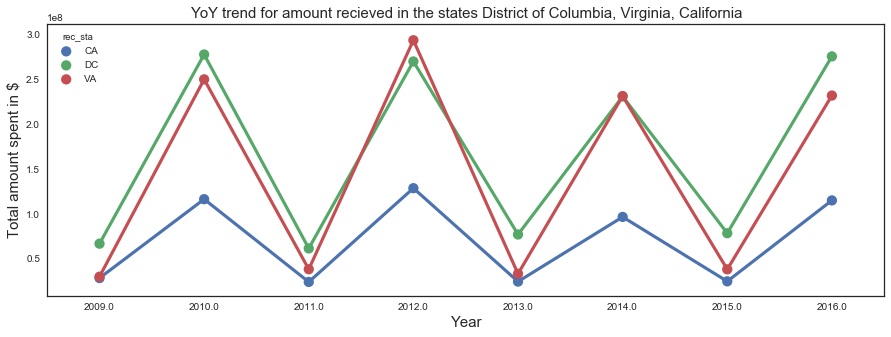

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Aggregating the data by the level of year and state recieved
data_sta_sum = pd.DataFrame(data1.groupby(['year_rec','rec_sta'],as_index=False).dis_amo_in_dol.sum())

# Subsetting the data for DC, VA and CA
data_3_states = data_sta_sum.loc[data_sta_sum['rec_sta'].isin(["DC","VA","CA"])]

# Graph plot and graph settings
mpl.rc("figure", figsize=(15, 5))
sns.set_style("white")

graph7 = sns.pointplot(x="year_rec", y="dis_amo_in_dol", hue="rec_sta", data=data_3_states)

graph7.set_ylabel('Total amount spent in $',size=15)
graph7.set_xlabel('Year',size=15)
graph7.set_title('YoY trend for amount recieved in the states District of Columbia, Virginia, California',size=15)

The stack charts of Virginia and DC are different from the general trend.
The Advertising expenses are highest when compared to other expenses in Virginia. 
In DC, the political contributions is very high percentage when compared to other expenses.

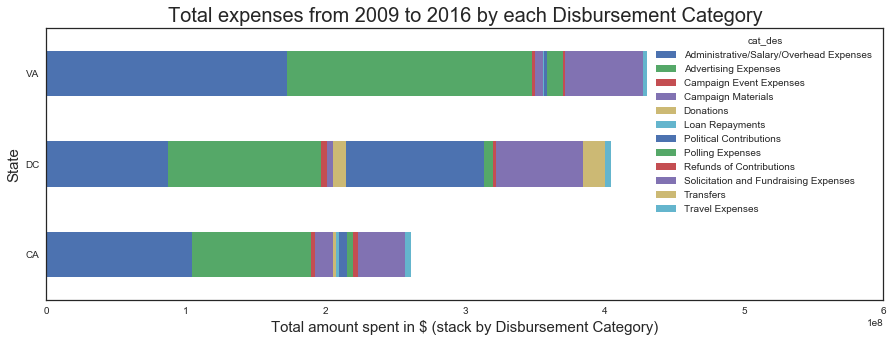

In [40]:
# Aggregated data by state recieved and and category descrption
data_sta_sum = pd.DataFrame(data.groupby(['cat_des','rec_sta'],as_index=False).dis_amo_in_dol.sum())

# Subsetting the aggregated data for DC, VA and CA
data_DC = data_sta_sum.loc[data_sta_sum['rec_sta'].isin(["DC","VA","CA"])]

# Data is transposed for stack chart
df1 = data_DC.pivot(index='rec_sta', columns='cat_des', values='dis_amo_in_dol')

# Graph plot and graph settings
graph8 = df1.plot.barh(stacked=True,figsize=(15,5))

graph8.set_xlim(0,600000000)
graph8.set_ylabel('State',size=15)
graph8.set_xlabel('Total amount spent in $ (stack by Disbursement Category)',size=15)
graph8.set_title('Total expenses from 2009 to 2016 by each Disbursement Category',size=20)

In [ ]:
20% of the total expenses in four years are recieved by the top 30 companies mentioned in the graph. Most of the top 30 companies 
are related to Media group or political consultancies. 

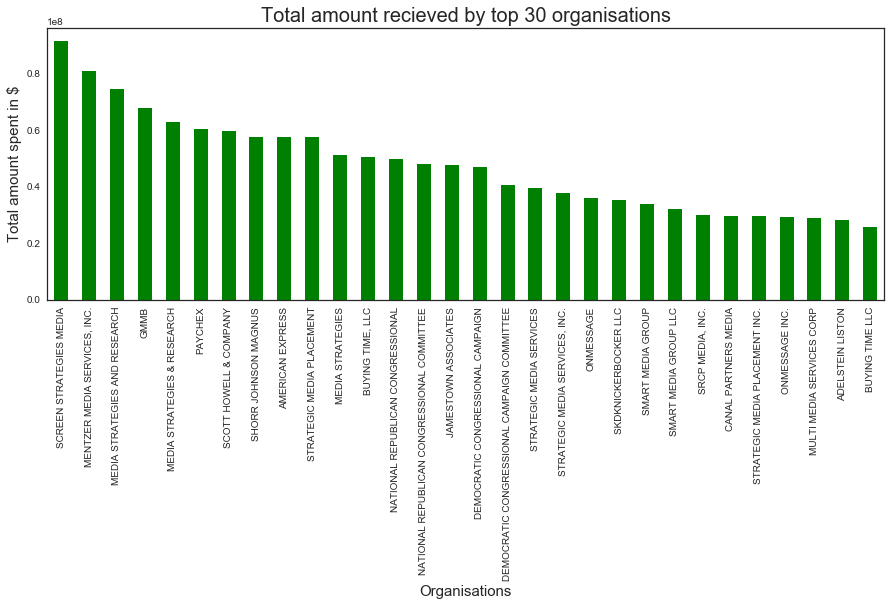

In [41]:
# Applying grup by function and plotting the graph
graph9 = data.groupby(['rec_nam']).dis_amo_in_dol.sum().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,5),color='g')

# Graph settings
graph9.set_ylabel('Total amount spent in $',size=15)
graph9.set_xlabel('Organisations',size=15)
graph9.set_title('Total amount recieved by top 30 organisations',size=20)

The top companies in terms of number of tansactions are very differnt when compared to the previous graph.
Network companies, Airlines and Banks are majorly seen in this section

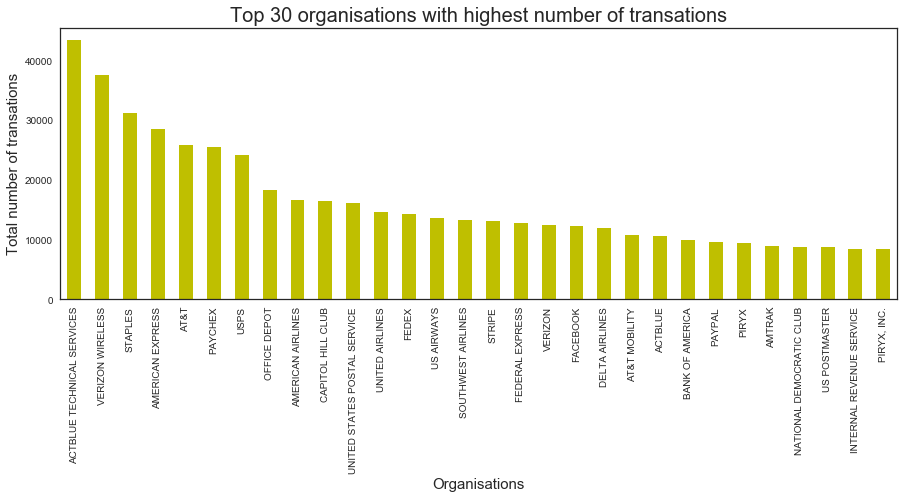

In [42]:
# Applying grup by functionand plotting the graph
graph10 = data.groupby(['rec_nam']).dis_amo_in_dol.count().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,5),color='y')

# Graph settings
graph10.set_ylabel('Total number of transations',size=15)
graph10.set_xlabel('Organisations',size=15)
graph10.set_title('Top 30 organisations with highest number of transations',size=20)